# Example of XbarR control charts

Process behaviour charts are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

For the Xbar chart, data are collected using rational sampling of size 2 or greater. The average values of each rational sample are plotted in time order. A central line (average of averages) is plotted. Control limits above and below the central line are plotted.

$$
    \begin{align}
        UCL_\overline{X}, LCL_\overline{X} & = \overline{\overline{X}} \pm 3 \times \text{Sigma(}\overline{X}\text{)} \\
                     & = \overline{\overline{X}} \pm 3 \times \frac{\text{Sigma(X) }}{\sqrt{n}} \\
                     & = \overline{\overline{X}} \pm \frac{3 \text{ }\overline{R}}{d_2 \sqrt{n}}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size $n$ changes.

The range for each rational sample is calculated and plotted on the R chart. A central line (average range) is plotted. Control limits above and below the central line are plotted.
    
$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of subgroup size.

# Datasense library

## First-time user

Do this if this is your first-time installation.

Install `git`. If using `Anaconda`:

    conda install git

Then install `datasense`:

    pip install --user -e "git+https://github.com/gillespilon/datasense#egg=datasense"

## Updating the library

Do this if you are updating a previously-installed version of `datasense`.

    pip install --user --upgrade -e "git+https://github.com/gillespilon/datasense#egg=datasense"

# Data

In this notebook, a data set is created in the notebook. There is a function if you wish to read your data from a csv, xlsx, or ods file. The first column of the file is the sample ID. The remaining columns are the data. Each column should have a column label.

# Control chart rules

**Rule one**. One point outside the three-sigma limits. Is used with the X, mR, Xbar, and R charts.

**Rule two**. Two-out-of-three successive points on the same side of the central line
and both are more than two sigma units away from the central line. Is used with the X and Xbar charts.

**Rule three**. Four-out-of-five successive points on the same side of the central line and are more than one sigma units away from the central line. Is used with the X and Xbar charts.

**Rule four**. Eight successive points all on the same side of the central line. Is used with the X and Xbar charts.

# References

Wheeler, Donald J., and Rip Stauffer. 2017. “When Should We Use Extra Detection Rules? Using process behavior charts effectively.” *Quality Digest* (2017-10-02).

# Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datasense import control_charts as cc

In [3]:
data_file = 'xbar_r_example'

In [4]:
xbar_chart_title = 'Average Control Chart'
xbar_chart_ylabel = 'Measurement Xbar (units)'
xbar_chart_xlabel = 'Sample'

In [5]:
r_chart_title = 'Range Control Chart'
r_chart_ylabel = 'Measurement R (units)'
r_chart_xlabel = 'Sample'

In [6]:
def main():
    data = create_data()  # use the data in this notebook
#     data = read_csv(f'{data_file}.csv')  # read a csv file
#     data = read_xlsx(f'{data_file}.xlsx')  # read an xlsx file
#     data = read_ods(f'{data_file}.ods')  # read an ods file
    xbar_chart(data)
    r_chart(data)
#     help(cc.Xbar)
#     help(cc.R)

In [7]:
def create_data() -> pd.DataFrame:
    '''
    Create a dataframe.
    This function is for demonstration purposes.
    '''
    df = {
        'Sample':  [
                    1, 2, 3, 4, 5,
                    6, 7, 8, 9, 10,
                    11, 12, 13, 14, 15,
                    16, 17, 18, 19, 20,
                    21, 22, 23, 24, 25
                   ],
        'X1':      [
                    96, 68, 70, 68, 85,
                    57, 86, 56, 55, 73,
                    72, 70, 89, 59, 79,
                    71, 76, 80, 68, 43,
                    39, 83, 56, 95, 47
                   ],
        'X2':      [
                    69, 51, 69, 69, 69,
                    47, 69, 59, 81, 69,
                    69, 48, 76, 59, 53,
                    97, 51, 78, 66, 71,
                    72, 74, 69, 57, 68
                   ],
        'X3':      [
                    77, 71, 70, 64, 80,
                    45, 59, 53, 49, 82,
                    36, 78, 62, 93, 57,
                    66, 62, 71, 66, 48,
                    66, 56, 75, 88, 62
                   ],
        'X4':      [
                    63, 55, 91, 71, 48,
                    65, 65, 58, 69, 77,
                    82, 69, 57, 79, 38,
                    55, 84, 73, 103, 53,
                    79, 87, 51, 66, 74
                   ]
    }
    df = pd.DataFrame(df)
    df = df.set_index('Sample')
    return df

In [8]:
def read_csv(filename: str) -> pd.DataFrame:
    '''
    Create a dataframe.
    This function reads a csv file.
    '''
    df = pd.read_csv(filename, index_col='Sample')
    return df

In [9]:
def read_xlsx(filename: str) -> pd.DataFrame:
    '''
    Create a dataframe.
    This function reads an xlsx file.
    '''
    df = pd.read_excel(filename, index_col='Sample')
    return df

In [10]:
def read_ods(filename: str) -> pd.DataFrame:
    '''
    Creates a dataframe.
    This function reads an ods file.
    '''
    df = pd.read_excel(filename, index_col='Sample', engine='odf')
    return df

In [11]:
def xbar_chart(df: pd.DataFrame) -> None:
    '''
    Creates an Xbar control chart.
    Identifies out-of-control points.
    Adds cart and axis titles.
    Saves the figure in svg format.
    '''
    fig = plt.figure(figsize=(8, 6))
    xbar = cc.Xbar(df)
    ax = xbar.ax(fig)
    cc.draw_rule(xbar, ax, *cc.points_one(xbar), '1')
    cc.draw_rule(xbar, ax, *cc.points_four(xbar), '4')
    cc.draw_rule(xbar, ax, *cc.points_two(xbar), '2')
    ax.set_title(xbar_chart_title)
    ax.set_ylabel(xbar_chart_ylabel)
    ax.set_xlabel(xbar_chart_xlabel)
    ax.figure.savefig(f'{data_file}_xbar.svg')

In [12]:
def r_chart(df: pd.DataFrame) -> None:
    '''
    Creates an R control chart.
    Identifies out-of-control points.
    Adds chart and axis titles.
    Saves the figure in svg format.
    '''
    fig = plt.figure(figsize=(8, 6))
    r = cc.R(df)
    ax = r.ax(fig)
    cc.draw_rule(r, ax, *cc.points_one(r), '1')
    ax.set_title(r_chart_title)
    ax.set_ylabel(r_chart_ylabel)
    ax.set_xlabel(r_chart_xlabel)
    ax.figure.savefig(f'{data_file}_r.svg')

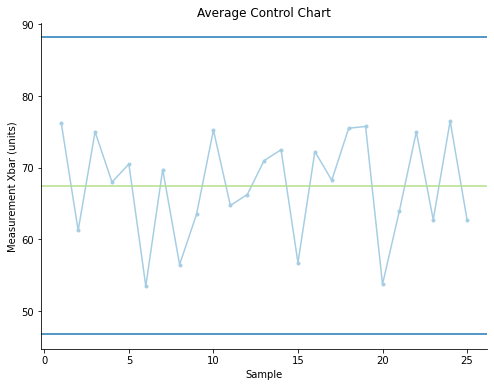

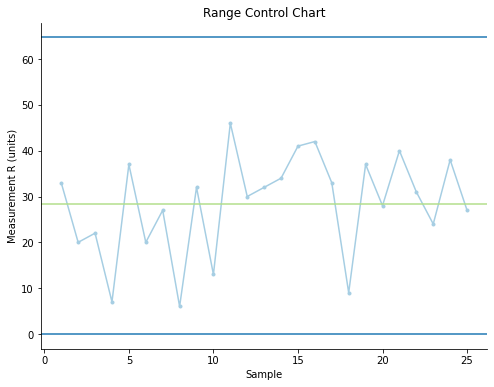

In [13]:
if __name__ == '__main__':
    main()